## In this notebook: Fig 2A

In [1]:
import mido
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import pandas as pd
import os

import matplotlib as mpl
plt.style.use("article.mplstyle")

In [2]:
#plot params
figs_dir = './figures'

marker = MarkerStyle('s')
marker._transform.scale(0.02, 0.5)  # Scale x by 0.5 (narrower), y by 2 (taller)


In [3]:
def onsets_pitch_from_midi(file):
    """ 
    Extracts the midi values from a file and returns them in a list, along with their times since the beginning.
    file: path of the MIDI file to be read
    """
    midi_file = mido.MidiFile(file)
    note_onsets = []
    times_since_start = []
    cumulative_time = 0

    for msg in midi_file:
        cumulative_time += msg.time  # Accumulate time in ticks
        if msg.type == "note_on" and msg.velocity > 0:  
            note_onsets.append(msg.note)
            times_since_start.append(cumulative_time)

    return note_onsets, times_since_start


## Plot keystrokes for paper

In [4]:
# test file with all keystrokes
midi_values, times = onsets_pitch_from_midi('../analysis_error/midi_analysis/midi_error_12_pre.mid')
x_values = np.arange(len(midi_values))
midi_values = np.array(midi_values)
np.unique(midi_values)

#replace 60 with 61 for even spacing on plot
midi_values[midi_values == 60] = 61

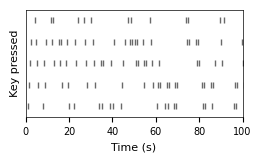

In [5]:

fig=plt.figure(figsize=(2.17, 1.07))
ax = fig.add_axes([0,0,1,1]) 
plt.scatter(times, midi_values, marker=marker, s=100, color='dimgrey') 
plt.xlim(0, 100)
plt.ylim(52, 62)


plt.xlabel('Time (s)')
plt.yticks([])
plt.xticks()
plt.ylabel('Key pressed')
plt.savefig(os.path.join(figs_dir, 'midi_example.svg'), transparent = True, bbox_inches = None)